## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import time
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. NABIL Bank (nabil) Stock Price Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MSc. Dissertation/Dataset/nabil.csv')

In [3]:
df.head()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,3/20/2011,"1,200.00","1,190.00","1,160.00","1,170.00",0.0,853,"1,000,811.00"
1,3/24/2011,"1,162.00","1,178.00","1,150.00","1,153.00",0.0,356,"412,649.00"
2,3/25/2011,"1,153.00","1,174.00","1,145.00","1,174.00",0.0,702,"807,507.00"
3,3/27/2011,"1,174.00","1,160.00","1,120.00","1,147.00",0.0,"1,426.00","1,619,270.00"
4,3/28/2011,"1,147.00","1,150.00","1,110.00","1,132.00",0.0,352,"393,534.00"


In [4]:
df.tail()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
3078,9/18/2024,562,565,550,556,-0.93,"68,886.00","38,431,118.40"
3079,9/22/2024,556,578,556,562,1.08,"55,026.00","31,054,968.70"
3080,9/23/2024,573.2,573.2,555,568,1.07,"123,568.00","69,577,465.00"
3081,9/24/2024,567,567,552.1,553.5,-2.55,"66,337.00","36,962,336.00"
3082,9/25/2024,550,560,545.1,555,0.27,"50,441.00","27,867,328.70"


In [5]:
df.duplicated().sum()

1

## Copying the dataset for future use

In [6]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

### Renaming and Dropping unwanted column

In [8]:
df.drop(['% Change', 'Turnover'], axis=1, inplace=True)
df = df.rename(columns = {
    'Ltp': 'Close',
    'Qty': 'Volume'
})

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float).astype(int)

### Splitting into features and target

In [10]:
X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building using Random Forest Regression



In [13]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Time taken to train the model:', end-start)

Time taken to train the model: 2.255920648574829


In [14]:
model.score(X_train, y_train)

0.9998603555558087

In [15]:
predicted = model.predict(X_test)
predicted

array([1150.92076618, 1609.83934625,  684.91105092, 1757.35803824,
       1070.50171952, 2314.85496006, 1143.82750505,  920.90869139,
        583.96975747, 1632.11742674,  829.40770325, 1980.4990395 ,
       1887.82191587, 1511.19735397, 1531.39725802, 1685.53481928,
        723.46396527, 1942.04747422,  759.90989634,  882.54985026,
        941.83021388, 1610.5841454 , 1896.83866939,  433.50014524,
        827.8780419 ,  903.09045115, 2409.73889816, 2534.31090909,
        930.47306836,  987.94723024, 1451.52592566,  591.76547331,
       2375.45201603, 1295.98052051, 1284.98020914, 1467.62191894,
       1239.28985325, 1064.20229789,  670.94175   , 1425.70132185,
        942.36908753,  606.18654136, 1473.55382635,  568.07527778,
       1354.96916667,  918.10842606, 2410.99825567, 1002.19944673,
       1490.17201081, 1977.03583284, 1741.99058102,  457.8498881 ,
        792.56541581,  869.05320788, 1894.89159888, 2427.37160065,
       1140.2785656 ,  685.15088403,  982.42594478, 1304.50612

In [16]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
for a in prediction.index:
    for b in df.index:
        if a == b:
            prediction['Date'] = df['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2011-03-20,1170.0,1181.088122
2011-04-13,1218.0,1144.268649
2011-04-28,1046.0,1050.820145
2011-05-04,1019.0,1033.160261
2011-05-10,1050.0,1040.750725
...,...,...
2024-07-31,649.3,646.461742
2024-08-07,631.5,614.185622
2024-09-04,595.0,608.746114


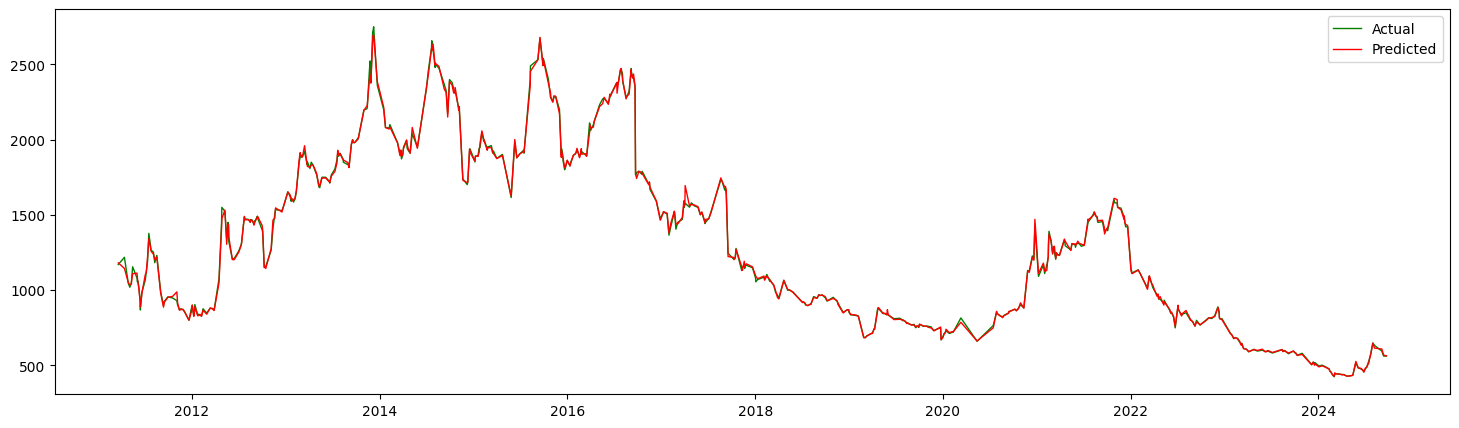

In [17]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

## Calculating the Performance Evaluation Metrics

In [18]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 250.92644160772315
Root Mean Squared Error: 15.840657865370463
Mean Absolute Error: 9.832818459330742


### Here the performance metrics are too much higher so, we have to tune the hyperparameters.

In [19]:
model_params = {
    'n_estimators': [5, 10, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    }

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), model_params, cv=5, return_train_score=False)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 100, 200]})

In [20]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [21]:
grid_search.best_score_

0.9992319365685434

In [22]:
grid_search_prediction = grid_search.predict(X_test)
grid_search_prediction

array([1150.91196894, 1610.86621765,  684.09010631, 1759.13884761,
       1072.05995926, 2314.44321831, 1143.07012321,  922.09415747,
        583.35973992, 1631.43161951,  829.97974437, 1983.1352086 ,
       1886.98033085, 1510.54510742, 1526.58017031, 1684.77864153,
        723.10706808, 1940.13934693,  758.74913136,  882.55217673,
        941.62784772, 1609.26118404, 1895.84459371,  433.93194948,
        828.38002785,  903.63937925, 2415.06715491, 2534.96014613,
        928.52518137,  984.23303117, 1451.69497298,  591.85141008,
       2376.75829006, 1295.4854866 , 1282.42459825, 1464.52858316,
       1245.14262469, 1063.69856469,  670.64845232, 1422.45037975,
        942.92200316,  606.51189092, 1472.52839395,  567.58608234,
       1358.73272129,  917.84762775, 2414.71341536, 1002.83390931,
       1491.25708095, 1974.60187333, 1737.23970299,  457.93129153,
        792.73305098,  870.72118639, 1893.24451191, 2434.19665663,
       1146.24308503,  685.26469932,  982.32838756, 1301.80130

In [23]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': grid_search_prediction})
for a in prediction.index:
    for b in df.index:
        if a == b:
            prediction['Date'] = df['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2011-03-20,1170.0,1180.479815
2011-04-13,1218.0,1142.012125
2011-04-28,1046.0,1052.429145
2011-05-04,1019.0,1027.930767
2011-05-10,1050.0,1043.295422
...,...,...
2024-07-31,649.3,645.718370
2024-08-07,631.5,618.055739
2024-09-04,595.0,605.279032


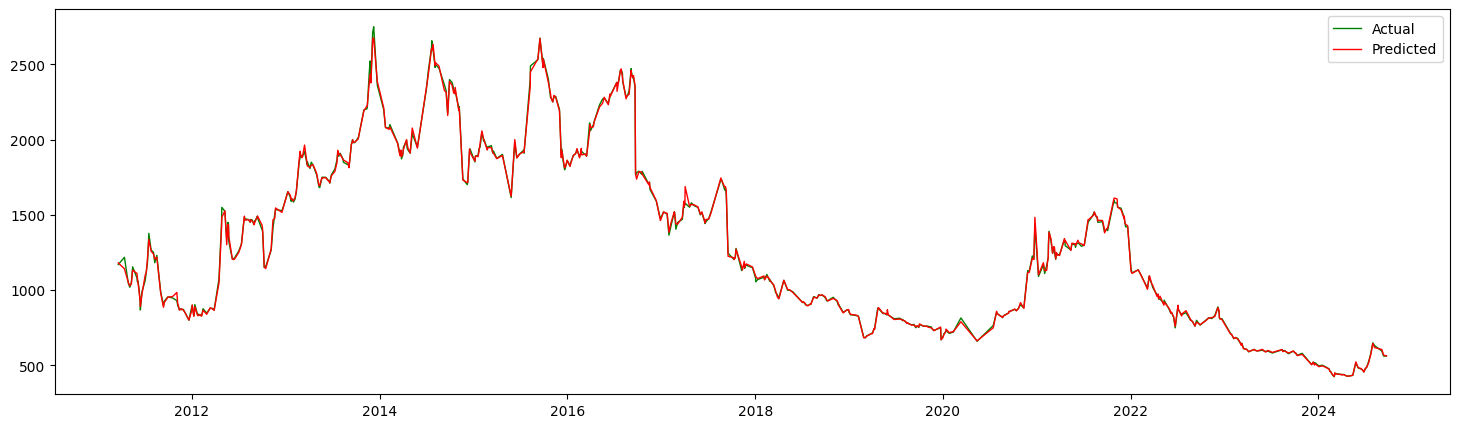

In [24]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

### Performance Evaluation Metrics after Hyperparameter Tuning

In [25]:
mse = mean_squared_error(y_test, grid_search_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, grid_search_prediction)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 243.20870169210906
Root Mean Squared Error: 15.595149941315379
Mean Absolute Error: 9.703442722776396
